# The Hodgkin-Huxley model 
 It is based on voltage-clamp experiments on the squid giant axon, the model incorporates 
voltage-sensitive ion channels into the circuit model of the membrane to describe the generation and propagation
of action potentials.



According the capacity rules:

\begin{equation}
C\frac{dV}{dt}  + I_{total} = 0 
\end{equation}

wen can get:
\begin{equation}
C\frac{dV}{dt}  = - I_{total}
\end{equation}

Based on experiments, Hodgkin and Huxley hypothesized that $I_{total}$ was made up of four components: A sodium current $I_{Na}$ , a potassium current $I_K$ , a small additional current which they called the leak current and denoted by $I_L$ , carried by chloride and other ions, and the current $I$ that they themselves injected, using electrodes, in the course of their experiments. Thus 

\begin{equation}
C\frac{dV}{dt}  = - I_{Na}- I_{K}- I_{L} - I
\end{equation}

The currents $I_{Na}$ , $I_K$ , and $I_L$  are assumed to obey Ohm’s law
$$I_{Na} = g_{Na}(v-E_{Na}), \qquad I_{K} = g_{K}(v-E_{K}), \qquad I_{L} = g_{L}(v-E_{L}) $$

Their descriptions of $g_{Na}$ and $g_{K}$ take the following forms:
$$ g_{Na} = \overline{g}_{Na}m^3h, \qquad g_{K} = \overline{g}_{K}n^4 $$

The two sodium $(m, h)$ and one potassium $(n)$ variables effect the relative conductances of their respective ion channels. As the channels open or close, the ionic currents contributed by each can either depolarize or hyperpolarize the membrane potential of the cell. This will give rise to the action potential phenomena given sufficient input current.

In summary, the Hodgkin-Huxley model is a systems of four differential equations, given as following:
\begin{align}
C\frac{dV}{dt} & = - \overline{g}_{Na}m^3h(V-E_{Na})- \overline{g}_{K}n^4 (V-E_{K})-\overline{g}_{L}(V-E_{L})\\
\frac{dm}{dt}& = \alpha_{m}(V)(1-m) -\beta_{m}(V)m \\
\frac{dh}{dt}& = \alpha_{h}(V)(1-h) -\beta_{h}(V)h \\
\frac{dn}{dt}& = \alpha_{n}(V)(1-n) -\beta_{n}(V)n \\
\end{align}

where
\begin{align}
\alpha_{m}(V) & = \frac{(V+45)/10}{1-exp(-(V+45)/10)},\qquad  \beta_{m}(V) = 4 exp(-(V+70)/18)\\
\alpha_{h}(V) & = 0.07exp(-(V+70)/20),\qquad  \beta_{h}(V) = \frac{1}{-(V+40)/10+1} \\
\alpha_{n}(V) & = \frac{1}{100}\frac{(V+60)/10}{1-exp(-(V+60)/10)},\qquad  \beta_{n}(V) = \frac{1}{8} exp(-(V+70)/80) 
\end{align}

In [2]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt


c = 1.0
g_k = 36.0
g_na = 120.0
g_l = 0.3
v_k = -82.0
v_na = 45.0
v_l = -59.0
i_ext = 7.0
t_final = 200.0
dt = 0.01


def beta_n(v):
    return 0.125 * exp(-(v + 70.0) / 80.0)

def beta_m(v):
    return 4.0 * exp(-(v + 70.0) / 18.0)


def beta_h(v):
    return 1. / (exp(-(v + 40.0) / 10.0) + 1.0)

def alpha_n(v):
    return 0.01 * (-60.0 - v) / (exp((-60.0 - v) / 10.0) - 1.0)

def alpha_m(v):
    # if np.abs(v+45.0) > 1.0e-8:
        return (v + 45.0) / 10.0 / (1.0 - exp(-(v + 45.0) / 10.0))
    
def alpha_h(v):
    return 0.07*exp(-(v+70)/20)


   # The steady state $x_{\infty}$,  time constants $\tau_x$
   The steady state  openning ofthe gates and time constants as following:
   $$x_{\infty}= \frac{\alpha_x}{\alpha_x+\beta_x}$$
   $$\tau_{x}= \frac{1}{\alpha_x+\beta_x}$$
   
   here x = $m,n,h$, difine the $x_{\infty}$

In [3]:
def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))

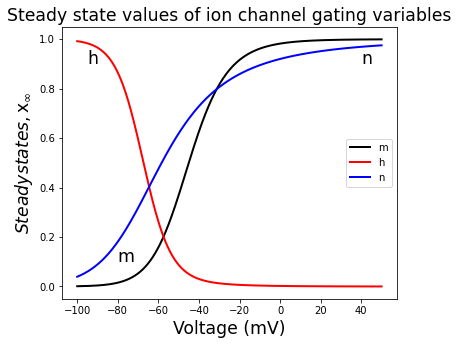

In [4]:
if __name__ == "__main__":
    v = np.arange(-100, 50, 0.01)
    #fig = plt.figure(1,figsize=(10,5))
    #ax = [plt.subplot(1,1,i) for i in range(1,2)]
    #ax[0].plot(v, m_inf(v), lw=2, c="k")
    #ax[0].plot(v, h_inf(v), lw=2, c="r")
    #ax[0].plot(v, n_inf(v), lw=2, c="b")
    #ax[0].legend(('m','h','n'))
    #plt.title('Steady state values of ion channel gating variables')
    fig = plt.figure(1,figsize=(6,5))
    
    plt.plot(v, m_inf(v), lw=2, c="k")
    plt.plot(v, h_inf(v), lw=2, c="r")
    plt.plot(v, n_inf(v), lw=2, c="b")
    plt.legend(('m','h','n')) # set the legend
    plt.text(-95, 0.90, 'h',fontsize =  'xx-large')
    plt.text(-80, 0.1, 'm',fontsize =  'xx-large')
    plt.text(40, 0.9, 'n',fontsize =  'xx-large')
    plt.ylabel(r'$Steady states,\mathsf{x_{\infty}}$',fontsize = 'xx-large')
    plt.xlabel('Voltage (mV)',fontsize = 'xx-large')
    plt.title('Steady state values of ion channel gating variables',fontsize = 'xx-large')
    

# The  function $\tau_x$ 


Text(0, 0.5, '$x_{\\infty} (v)$')

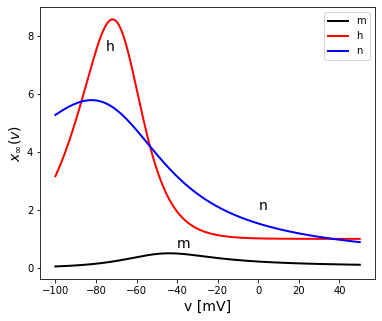

In [5]:
fig2=plt.figure(2,figsize =(6,5))
plt.plot(v,1.0 / (alpha_m(v) + beta_m(v)),lw=2, c="k")
plt.plot(v, 1.0/(alpha_h(v)+beta_h(v)), lw=2, c="r")
plt.plot(v, 1.0/(alpha_n(v)+beta_n(v)), lw=2, c="b")
plt.legend(('m','h','n')) # set the legend
plt.text(-40,0.7,'m',fontsize = 14)
plt.text(-75,7.5,'h',fontsize = 14)
plt.text(0,2.0,'n',fontsize = 14)
plt.xlabel("v [mV]", fontsize=14)
plt.ylabel(r"$x_{\infty} (v)$", fontsize=14)


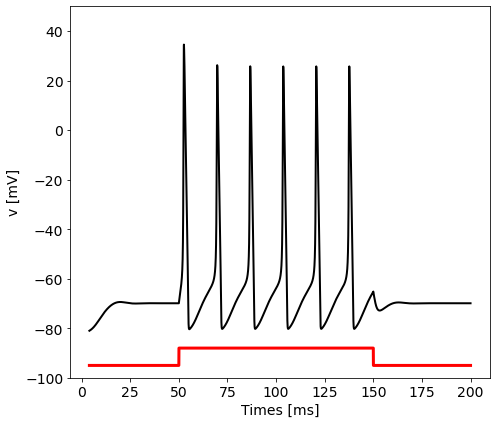

In [6]:
def derivative(x0, t, i_ext, PULSE_ONSET):
    '''
    define HH Model
    '''
    v, m, n, h, = x0

    if (t > PULSE_ONSET) & (t < PULSE_ONSET + 100):
        i_ext = 7
        
    dv = (i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)) / c
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h

    return [dv, dm, dn, dh]


v = -50.0
m = m_inf(v)
h = 0.6 #h_inf(v)
n = 0.4  #n_inf(v)
PULSE_ONSETS = 50.0
i_ext = 0
x0 = [v, m, n, h]

t = np.arange(0, t_final, dt)
it= np.zeros(len(t))
# find the postion through the index where inject current to neuron
it[np.where((t > PULSE_ONSETS) & (t < PULSE_ONSETS + 100))[0]]=7  
if __name__ == "__main__":

    fig, ax = plt.subplots(1, figsize=(7, 6), sharex=True)
    t1 = t[400:]
    tPulse = PULSE_ONSETS
    sol = odeint(derivative, x0, t, args=(i_ext, tPulse))
    v = sol[400:, 0]
    plt.plot(t1, v, lw=2, c="k")
    plt.plot(t1,it[400:]-95, lw=3, c="r")
    plt.ylim([-100, 50])
    plt.ylabel("v [mV]", fontsize=14)
    plt.xlabel("Times [ms]", fontsize=14)
    plt.tick_params(labelsize=14)
    

    plt.tight_layout()
    plt.savefig("fig_4.pdf")
    # pl.show()


Asolution of the Hodgkin-Huxley ODEs with $I = 10 \mu A/cm^2$

# Numerical soultion of the Hodgkin-Hulexy ODES 
"""
The Hodgkin-Huxley model is based on voltage-clamp experiments on the squid giant axon, the model incorporates 
voltage-sensitive ion channels into the circuit model of the membrane to describe the generation and propagation
of action potentials.

The two sodium (m, h) and one potassium (n) variables effect the relative conductances of their respective ion channels. 
As the channels open or close, the ionic currents contributed by each can either depolarize or hyperpolarize the membrane
potential of the cell. This will give rise to the action potential phenomena given sufficient input current.
"""

In [7]:
# K channel
alpha_n = np.vectorize(lambda v: 0.01*(-v + 10)/(np.exp((-v + 10)/10) - 1) if v != 10 else 0.1)
beta_n  = lambda v: 0.125*np.exp(-v/80)
n_inf   = lambda v: alpha_n(v)/(alpha_n(v) + beta_n(v))

# Na channel (activating)
alpha_m = np.vectorize(lambda v: 0.1*(-v + 25)/(np.exp((-v + 25)/10) - 1) if v != 25 else 1)
beta_m  = lambda v: 4*np.exp(-v/18)
m_inf   = lambda v: alpha_m(v)/(alpha_m(v) + beta_m(v))

# Na channel (inactivating)
alpha_h = lambda v: 0.07*np.exp(-v/20)
beta_h  = lambda v: 1/(np.exp((-v + 30)/10) + 1)
h_inf   = lambda v: alpha_h(v)/(alpha_h(v) + beta_h(v))

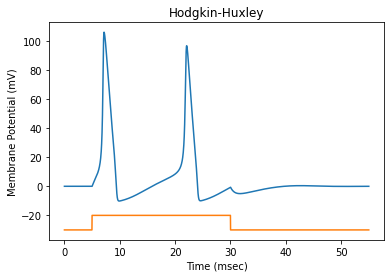

In [10]:
## setup parameters and state variables
T     = 55    # ms
dt    = 0.025 # ms
time  = np.arange(0,T+dt,dt)

## HH Parameters
V_rest  = 0      # mV
Cm      = 1      # uF/cm2
gbar_Na = 120    # mS/cm2
gbar_K  = 36     # mS/cm2
gbar_l  = 0.3    # mS/cm2
E_Na    = 115    # mV
E_K     = -12    # mV
E_l     = 10.613 # mV

Vm      = np.zeros(len(time)) # mV
Vm[0]   = V_rest
m       = m_inf(V_rest)      
h       = h_inf(V_rest)
n       = n_inf(V_rest)

## Stimulus
I = np.zeros(len(time))
for i, t in enumerate(time):
  if 5 <= t <= 30: I[i] = 10 # uA/cm2

## Simulate Model
for i in range(1,len(time)):
    g_Na = gbar_Na*(m**3)*h
    g_K  = gbar_K*(n**4)
    g_l  = gbar_l

    m += dt*(alpha_m(Vm[i-1])*(1 - m) - beta_m(Vm[i-1])*m)
    h += dt*(alpha_h(Vm[i-1])*(1 - h) - beta_h(Vm[i-1])*h)
    n += dt*(alpha_n(Vm[i-1])*(1 - n) - beta_n(Vm[i-1])*n)

    Vm[i] = Vm[i-1] + (I[i-1] - g_Na*(Vm[i-1] - E_Na) - g_K*(Vm[i-1] - E_K) - g_l*(Vm[i-1] - E_l)) / Cm * dt 

## plot membrane potential trace
fig=plt.figure()
plt.plot(time, Vm, time, -30+I)
plt.title('Hodgkin-Huxley')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (msec)')

plt.show()